In [0]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
X_train.shape

(60000, 28, 28)

In [0]:
batch_size = 128
num_classes = 10
epochs = 128

In [0]:
img_rows, img_cols = 28, 28


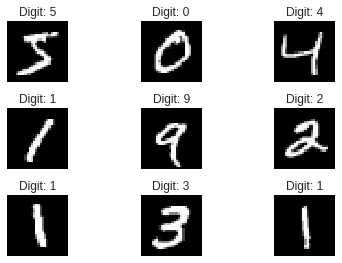

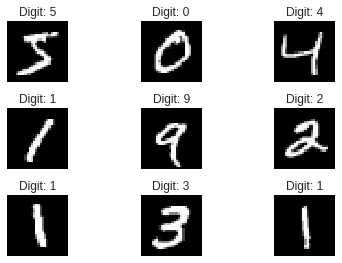

In [21]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Text(0.5,1,'Pixel Value Distribution')

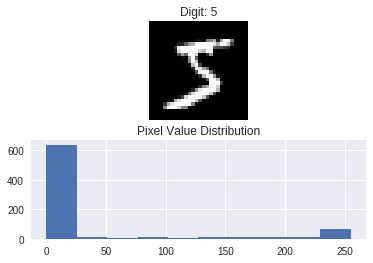

In [22]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
#fig

In [23]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [0]:

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [26]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [27]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [28]:
num_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

Shape before one-hot encoding:  (60000,)


In [0]:
num_epoch=10
batch_size=128

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [0]:
opt = optimizers.Adam()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [33]:
hist = model.fit(X_train,Y_train,batch_size=batch_size, validation_data=(X_test,Y_test),epochs=num_epoch)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.1743 - acc: 0.9474 - val_loss: 0.0513 - val_acc: 0.9834
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0334 - val_acc: 0.9889
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0340 - acc: 0.9891 - val_loss: 0.0293 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0252 - acc: 0.9915 - val_loss: 0.0229 - val_acc: 0.9927
Epoch 5/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0197 - acc: 0.9936 - val_loss: 0.0279 - val_acc: 0.9902
Epoch 6/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0154 - acc: 0.9951 - val_loss: 0.0203 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0254 - 

In [0]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

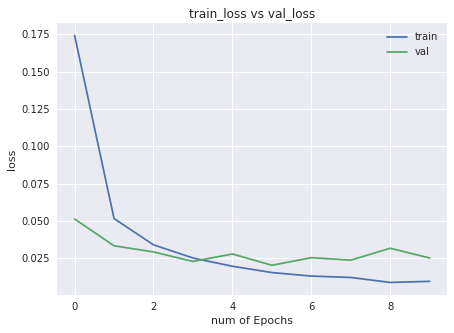

In [35]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

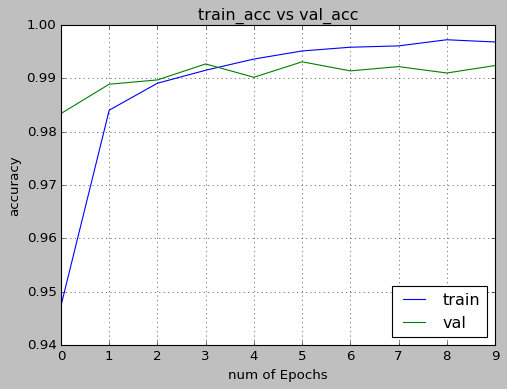

In [36]:
plt.savefig('loss_curve_cnn_ex-1')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# to save figure
plt.savefig('acc_curve_cnn_ex-1')

In [37]:
score = model.evaluate(X_test, Y_test)
print (score)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')

10000/10000 [==============================] - 1s 101us/step
[0.02517564370815344, 0.9924]
loss: 0.02517564370815344
acc:  99.24%


In [40]:
model.predict(X_test[10:12])

array([[1.0000000e+00, 8.0233190e-14, 7.9947993e-10, 5.7890162e-15,
        2.7765899e-14, 4.2028924e-13, 3.9744968e-11, 7.0648355e-11,
        2.8080328e-11, 9.8147011e-09],
       [3.4206148e-11, 2.2284764e-17, 5.2538102e-17, 9.5810935e-16,
        6.7562794e-16, 2.7146448e-11, 1.0000000e+00, 8.3448158e-20,
        7.0229579e-11, 1.5500270e-19]], dtype=float32)

In [41]:
Y_test[10:12]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [42]:
model.predict_classes(X_test[10:15])

array([0, 6, 9, 0, 1])

In [43]:
Y_test[10:15]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.models import load_model

In [0]:
model.save('cnn_model_ex-1.h5')

In [0]:
loaded_model=load_model('cnn_model_ex-1.h5')

In [47]:
loaded_model.predict_classes(X_test[10:15])

array([0, 6, 9, 0, 1])

In [48]:
Y_test[10:15]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [51]:

len(model.layers)

12

In [52]:
model.layers[0].output_shape

(None, 26, 26, 32)

In [54]:
model.layers[0].get_weights()

[array([[[[ 3.06806505e-01, -1.35178506e-01,  6.69867918e-02,
            7.66539797e-02, -6.88620433e-02,  1.73196554e-01,
            2.74902999e-01,  1.43210083e-01, -1.65624395e-01,
           -1.50560275e-01, -3.38781267e-01,  1.85573354e-01,
           -2.14588940e-01,  2.16297567e-01,  2.50634700e-02,
           -5.68092316e-02, -6.75601587e-02,  3.37350629e-02,
           -2.19535783e-01,  1.70974433e-01,  6.30948469e-02,
           -1.12292491e-01,  3.73859960e-03,  5.86540438e-02,
            1.20297909e-01,  9.49877724e-02,  1.45406416e-02,
            2.98986398e-02, -3.00781190e-01,  7.68806040e-02,
            7.60925114e-02,  1.35989234e-01]],
 
         [[ 5.31876199e-02, -1.50476974e-02, -2.59547438e-02,
           -1.76005363e-02, -3.26207966e-01, -1.34826094e-01,
            2.40796104e-01,  5.68656437e-02, -1.48620844e-01,
           -1.05708107e-01, -1.54615641e-01, -2.99875326e-02,
           -5.00758700e-02, -2.96995640e-01,  6.94037452e-02,
           -1.9158783

In [55]:
wt = model.layers[0].get_weights()
#wt.shape
weights = wt[0]
bias = wt[1]
print ('weights_shape: ',wt[0].shape)
print ('bias_shape: ',wt[1].shape)

weights_shape:  (3, 3, 1, 32)
bias_shape:  (32,)


In [0]:
def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

In [57]:
layer_num=3
filter_num=0
test_image = X_test[0:1]
print ('test_image_shape: ',test_image.shape)

test_image_shape:  (1, 28, 28, 1)


In [58]:
activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

(1, 1, 11, 11, 64)
(11, 11, 64)


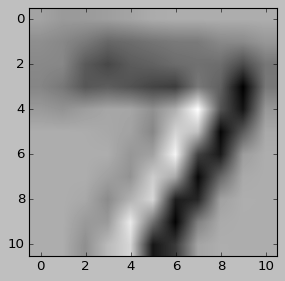

In [59]:
ig=plt.figure(figsize=(4,4))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

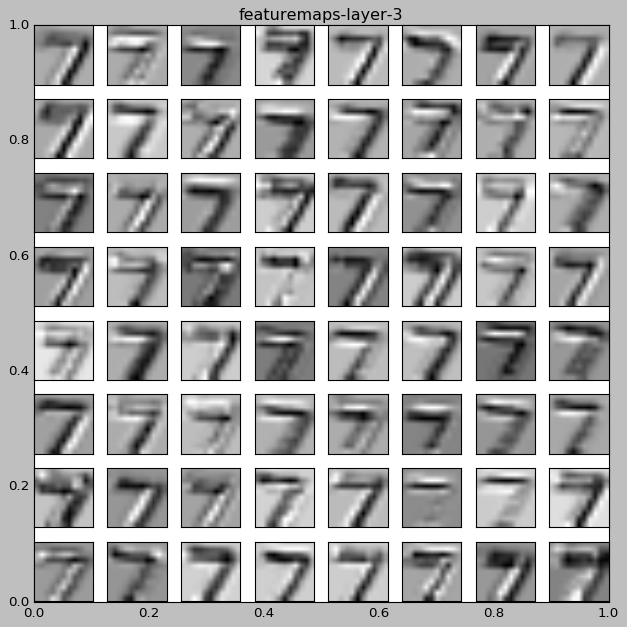

In [61]:

num_of_featuremaps =feature_maps.shape[2]
fig=plt.figure(figsize=(8,8))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(0)', 'class 1(1)', 'class 2(2)','class 3(3)','class 4(4)','class 5(5)','class 6(6)'
                ,'class 7(7)','class 8(8)','class 9(9)']

print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

             precision    recall  f1-score   support

 class 0(0)       0.99      1.00      0.99       980
 class 1(1)       1.00      1.00      1.00      1135
 class 2(2)       0.99      0.99      0.99      1032
 class 3(3)       0.99      0.99      0.99      1010
 class 4(4)       0.99      0.99      0.99       982
 class 5(5)       0.99      0.99      0.99       892
 class 6(6)       0.99      0.99      0.99       958
 class 7(7)       0.99      0.99      0.99      1028
 class 8(8)       0.99      0.99      0.99       974
 class 9(9)       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000

[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1132    0    2    0    0    0    0    1    0]
 [   0    0 1024    0    0    0    0    7    1    0]
 [   0    0    0 1004    0    2    0    0    4    0]
 [   0    0    1    0  973    0    3    1    0    4]
 [   2    0    0    6    0  879    1    0    4    0]
 [   3    2    0    1    1    1  948    0  

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1132    0    2    0    0    0    0    1    0]
 [   0    0 1024    0    0    0    0    7    1    0]
 [   0    0    0 1004    0    2    0    0    4    0]
 [   0    0    1    0  973    0    3    1    0    4]
 [   2    0    0    6    0  879    1    0    4    0]
 [   3    2    0    1    1    1  948    0    2    0]
 [   0    2    5    1    0    0    0 1019    0    1]
 [   2    0    1    1    0    0    0    0  968    2]
 [   0    0    0    0    4    4    0    1    0 1000]]


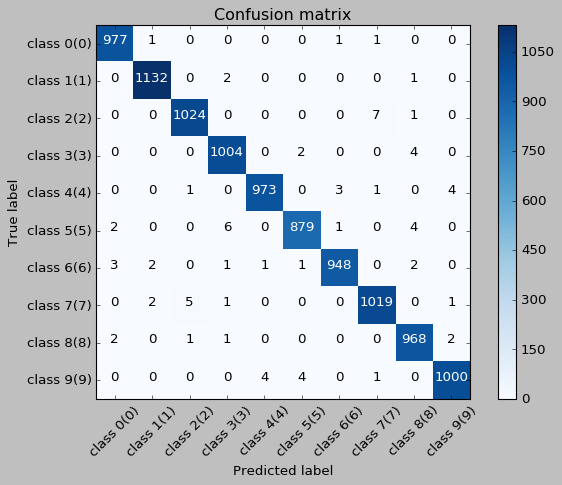

In [64]:
cnf_matrix = (confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,title='Confusion matrix')
plt.show()